In [6]:
import json

json_path = "D:/DL_Data/COCO2017/annotations/instances_val2017.json"
json_labels = json.load(open(json_path, "r"))
print(json_labels['info'])


{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}


loading annotations into memory...
Done (t=0.72s)
creating index...
index created!
number of images: 5000


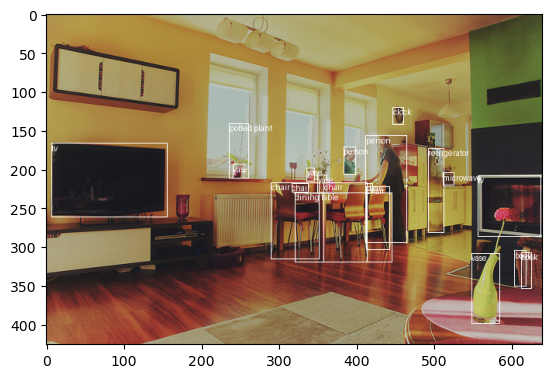

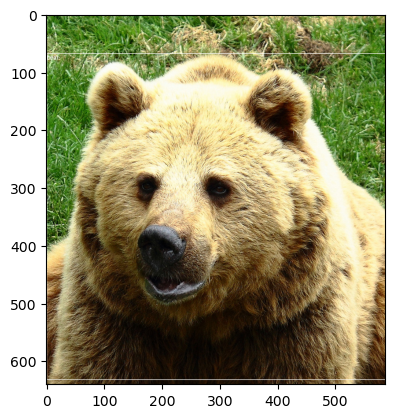

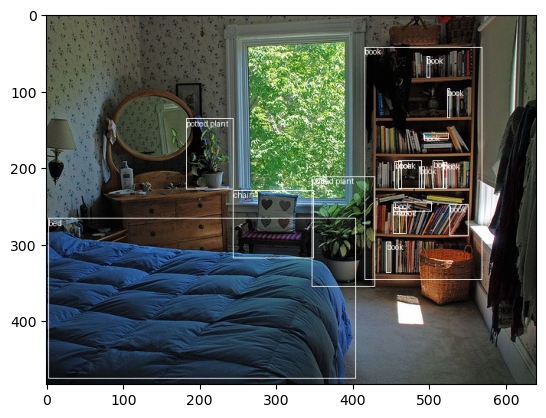

In [1]:
import os
from pycocotools.coco import COCO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

json_path = "D:/DL_Data/COCO2017/annotations/instances_val2017.json"
img_path = "D:/DL_Data/COCO2017/val2017"

# load coco data
coco = COCO(annotation_file=json_path)

# get all image index info
ids = list(sorted(coco.imgs.keys()))
print("number of images: {}".format(len(ids)))

# get all coco class labels
coco_classes = dict([(v["id"], v["name"]) for k, v in coco.cats.items()])

# 遍历前三张图像
for img_id in ids[:3]:
    # 获取对应图像id的所有annotations idx信息
    ann_ids = coco.getAnnIds(imgIds=img_id)

    # 根据annotations idx信息获取所有标注信息
    targets = coco.loadAnns(ann_ids)

    # get image file name
    path = coco.loadImgs(img_id)[0]['file_name']

    # read image
    img = Image.open(os.path.join(img_path, path)).convert('RGB')
    draw = ImageDraw.Draw(img)
    # draw box to image
    for target in targets:
        x, y, w, h = target["bbox"]
        x1, y1, x2, y2 = x, y, int(x + w), int(y + h)
        draw.rectangle((x1, y1, x2, y2))
        draw.text((x1, y1), coco_classes[target["category_id"]])

    # show image
    plt.imshow(img)
    plt.show()


loading annotations into memory...
Done (t=0.96s)
creating index...
index created!
number of images: 5000


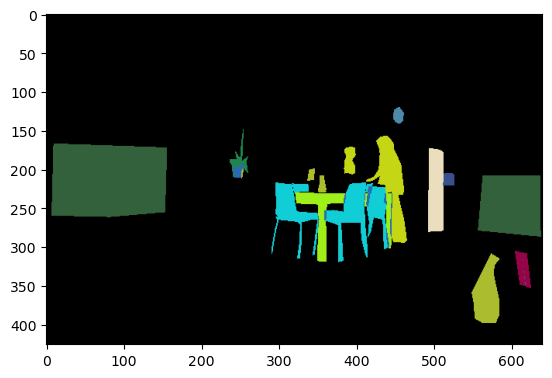

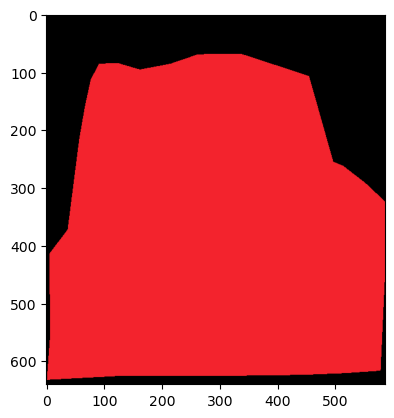

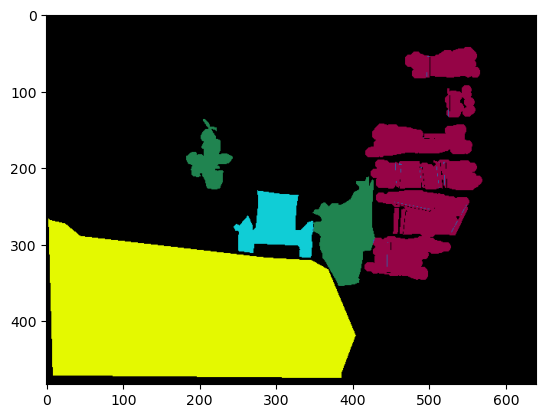

In [8]:

import os
import random

import numpy as np
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

random.seed(0)

json_path = "D:/DL_Data/COCO2017/annotations/instances_val2017.json"
img_path = "D:/DL_Data/COCO2017/val2017"

# random pallette
pallette = [0, 0, 0] + [random.randint(0, 255) for _ in range(255*3)]

# load coco data
coco = COCO(annotation_file=json_path)

# get all image index info
ids = list(sorted(coco.imgs.keys()))
print("number of images: {}".format(len(ids)))

# get all coco class labels
coco_classes = dict([(v["id"], v["name"]) for k, v in coco.cats.items()])

# 遍历前三张图像
for img_id in ids[:3]:
    # 获取对应图像id的所有annotations idx信息
    ann_ids = coco.getAnnIds(imgIds=img_id)
    # 根据annotations idx信息获取所有标注信息
    targets = coco.loadAnns(ann_ids)

    # get image file name
    path = coco.loadImgs(img_id)[0]['file_name']
    # read image
    img = Image.open(os.path.join(img_path, path)).convert('RGB')
    img_w, img_h = img.size

    masks = []
    cats = []
    for target in targets:
        cats.append(target["category_id"])  # get object class id
        polygons = target["segmentation"]   # get object polygons
        rles = coco_mask.frPyObjects(polygons, img_h, img_w)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = mask.any(axis=2)
        masks.append(mask)

    cats = np.array(cats, dtype=np.int32)
    if masks:
        masks = np.stack(masks, axis=0)
    else:
        masks = np.zeros((0, height, width), dtype=np.uint8)

    # merge all instance masks into a single segmentation map
    # with its corresponding categories
    target = (masks * cats[:, None, None]).max(axis=0)
    # discard overlapping instances
    target[masks.sum(0) > 1] = 255
    target = Image.fromarray(target.astype(np.uint8))

    target.putpalette(pallette)
    plt.imshow(target)
    plt.show()


In [9]:
import numpy as np
from pycocotools.coco import COCO

json_path = "D:/DL_Data/COCO2017/annotations/person_keypoints_val2017.json"
coco = COCO(json_path)
img_ids = list(sorted(coco.imgs.keys()))

# 遍历前5张图片中的人体关键点信息(注意，并不是每张图片里都有人体信息)
for img_id in img_ids[:5]:
    idx = 0
    img_info = coco.loadImgs(img_id)[0]
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        xmin, ymin, w, h = ann['bbox']
        # 打印人体bbox信息
        print(f"[image id: {img_id}] person {idx} bbox: [{xmin:.2f}, {ymin:.2f}, {xmin + w:.2f}, {ymin + h:.2f}]")
        keypoints_info = np.array(ann["keypoints"]).reshape([-1, 3])
        visible = keypoints_info[:, 2]
        keypoints = keypoints_info[:, :2]
        # 打印关键点信息以及可见度信息
        print(f"[image id: {img_id}] person {idx} keypoints: {keypoints.tolist()}")
        print(f"[image id: {img_id}] person {idx} keypoints visible: {visible.tolist()}")
        idx += 1


loading annotations into memory...
Done (t=0.29s)
creating index...
index created!
[image id: 139] person 0 bbox: [412.80, 157.61, 465.85, 295.62]
[image id: 139] person 0 keypoints: [[427, 170], [429, 169], [0, 0], [434, 168], [0, 0], [441, 177], [446, 177], [437, 200], [430, 206], [430, 220], [420, 215], [445, 226], [452, 223], [447, 260], [454, 257], [455, 290], [459, 286]]
[image id: 139] person 0 keypoints visible: [1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[image id: 139] person 1 bbox: [384.43, 172.21, 399.55, 207.95]
[image id: 139] person 1 keypoints: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[image id: 139] person 1 keypoints visible: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import json

results = []  # 所有预测的结果都保存在该list中
# write predict results into json file
json_str = json.dumps(results, indent=4)
with open('predict_results.json', 'w') as json_file:
    json_file.write(json_str)


In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


# accumulate predictions from all images
# 载入coco2017验证集标注文件
coco_true = COCO(annotation_file="/data/coco2017/annotations/instances_val2017.json")
# 载入网络在coco2017验证集上预测的结果
coco_pre = coco_true.loadRes('predict_results.json')

coco_evaluator = COCOeval(cocoGt=coco_true, cocoDt=coco_pre, iouType="bbox")
coco_evaluator.evaluate()
coco_evaluator.accumulate()
coco_evaluator.summarize()


In [ ]:
T = len(p.iouThrs)  # [0.5, 0.55, ..., 0.95]
R = len(p.recThrs)  # [0, 0.01, 0.02, ..., 1]
K = len(p.catIds) if p.useCats else 1
A = len(p.areaRng)  # [[0, 10000000000.0], [0, 1024], [1024, 9216], [9216, 10000000000.0]]
M = len(p.maxDets)  # [1, 10, 100]
precision = -np.ones((T, R, K, A, M))  # -1 for the precision of absent categories
recall = -np.ones((T, K, A, M))
scores = -np.ones((T, R, K, A, M))
